# Karan_Bhanushali_ABADS13_Bank Telemarketing Campaign

# 1. Understanding the Dataset

**a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
# Load the data 
df_marketing = pd.read_csv(r"C:\Users\ADMIN\Downloads\Python Project2\bank_marketing_updated_v1.csv", skiprows=2)

# Resetting the index
df_marketing.reset_index(drop=True, inplace=True)

#Structure
df_marketing.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
# Shape
df_marketing.shape

(45211, 19)

In [4]:
# Info
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [5]:
# Checking the Missing Value, Data Type and Duplicates
df_new=pd.DataFrame(df_marketing)

# Checking the missing values
missing_values = df_new.isnull().sum()

# Get the data types
data_types = df_new.dtypes

# Count duplicates
duplicate_count = df_new.duplicated().sum()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Types': data_types,
    'Duplicate Count': [duplicate_count] * len(missing_values)
})

summary

,Missing Values,Data Types,Duplicate Count
customerid,0,int64,0
age,20,float64,0
salary,0,int64,0
balance,0,int64,0
marital,0,object,0
jobedu,0,object,0
targeted,0,object,0
default,0,object,0
housing,0,object,0
loan,0,object,0


In [6]:
# Generate summary statistics for all columns (including categorical data)
df_cat = df_new.describe(include='all')
df_cat

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,45211.000000,45191.000000,45211.000000,45211.000000,45211,45211,45211,45211,45211,45211,45211,45211.000000,45161,45211,45211.000000,45211.000000,45211.000000,45211,45181
unique,NaN,NaN,NaN,NaN,3,48,2,2,2,2,3,NaN,12,2646,NaN,NaN,NaN,4,2
top,NaN,NaN,NaN,NaN,married,"management,tertiary",yes,no,yes,no,cellular,NaN,"may, 2017",1.5 min,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,NaN,NaN,27214,7801,37091,44396,25130,37967,29285,NaN,13747,138,NaN,NaN,NaN,36959,39894
mean,22606.000000,40.935651,57006.171065,1362.272058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.806419,NaN,NaN,2.763841,40.197828,0.580323,NaN,NaN
std,13051.435847,10.619198,32085.718415,3044.765829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.322476,NaN,NaN,3.098021,100.128746,2.303441,NaN,NaN
min,1.000000,18.000000,0.000000,-8019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,11303.500000,33.000000,20000.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,22606.000000,39.000000,60000.000000,448.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,33908.500000,48.000000,70000.000000,1428.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
# Selecting the numeric columns only
columns_to_keep = ['age', 'salary', 'balance',]
df_num = df_new[columns_to_keep]
df_num.head()

,age,salary,balance
0,58.0,100000,2143
1,44.0,60000,29
2,33.0,120000,2
3,47.0,20000,1506
4,33.0,0,1


In [8]:
# Descriptions of numeric columns
df_num.describe()

,age,salary,balance
count,45191.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058
std,10.619198,32085.718415,3044.765829
min,18.000000,0.000000,-8019.000000
25%,33.000000,20000.000000,72.000000
50%,39.000000,60000.000000,448.000000
75%,48.000000,70000.000000,1428.000000
max,95.000000,120000.000000,102127.000000


**b. Inspect for any instances of missing values, outliers, or data inconsistencies.**

In [9]:
# Checking the Missing Value
missing_values = df_marketing.isnull().sum()
missing_values

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [10]:
# Inspecting the outliers

Outliers in Columns:
    Column  Outlier Count
0      age            487
1   salary              0
2  balance           4729


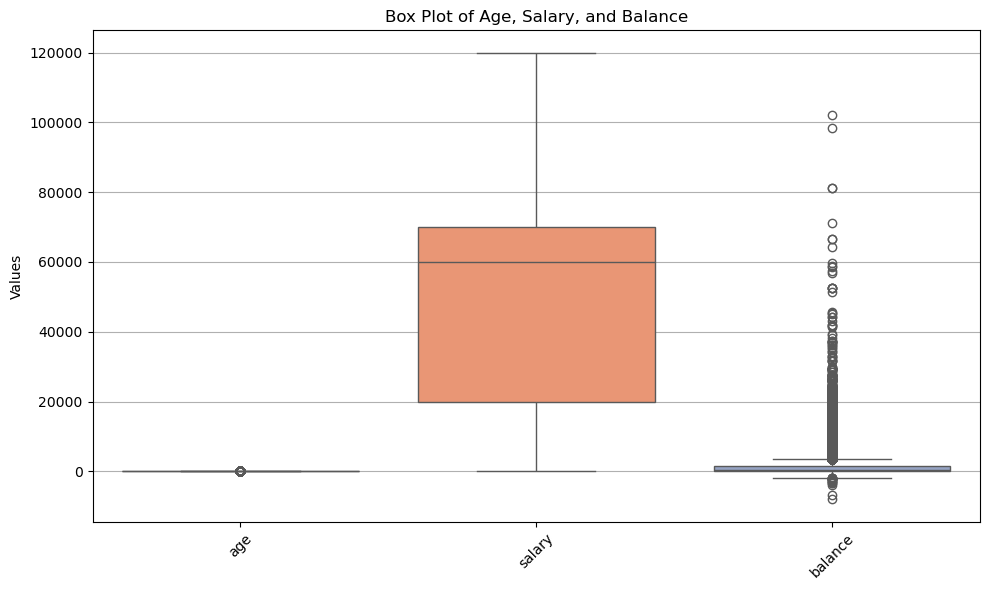

In [11]:
# Calculate the first and third quartiles for specified columns
Q1 = df_num[['age', 'salary', 'balance']].quantile(0.25)
Q3 = df_num[['age', 'salary', 'balance']].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df_num[['age', 'salary', 'balance']] < (Q1 - 1.5 * IQR)) | 
             (df_num[['age', 'salary', 'balance']] > (Q3 + 1.5 * IQR)))

# Convert outliers to a DataFrame for summary
outliers_count = outliers.sum()
outliers_df = outliers_count.reset_index()
outliers_df.columns = ['Column', 'Outlier Count']

# Result
print("Outliers in Columns:")
print(outliers_df)

# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num[['age', 'salary', 'balance']], palette="Set2")

# Customizing the plot
plt.title('Box Plot of Age, Salary, and Balance')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Check for Inconsistencies:

In [13]:
# Count negative values in all columns of df_num
negative_values = df_num[df_num < 0].count()

# Display the columns with negative values
print("Columns with Negative Values:")
print(negative_values)

Columns with Negative Values:
age           0
salary        0
balance    3766
dtype: int64


**Cleaning up the data**

In [14]:
# Handling the missing Value

In [15]:
# Creating a copy
df_marketing_cleaned = df_marketing.copy()

# Handling missing values for 'age'
df_marketing_cleaned['age'] = df_marketing_cleaned['age'].fillna(df_marketing_cleaned['age'].median())

# Handling missing values for 'month'
df_marketing_cleaned['month'] = df_marketing_cleaned['month'].fillna(df_marketing_cleaned['month'].mode()[0])

# Handling missing values for 'response'
df_marketing_cleaned['response'] = df_marketing_cleaned['response'].fillna("No Response")

df_marketing_cleaned.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [16]:
# Changing the dtype of duration
df_marketing_final = pd.DataFrame(df_marketing_cleaned)

def convert_duration(duration):
    # Remove any extra spaces for consistency
    duration = duration.strip()
    
    if 'min' in duration:
        # If duration is in minutes
        parts = duration.split()
        minutes = float(parts[0])  # Get the number of minutes
        total_seconds = int(minutes * 60)  # Convert to seconds
    else:
        # Assume it's in seconds; handle case with 'sec'
        total_seconds = int(duration.replace(' sec', '').strip())
    
    return total_seconds

# Apply the conversion function to get total seconds
df_marketing_final['total_seconds'] = df_marketing_final['duration'].apply(convert_duration)

# Converting age column from float to integer
df_marketing_final['age'] = df_marketing_final['age'].astype(int)

# Display the updated DataFrame
df_marketing_final.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,total_seconds
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,261
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,151
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,76
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,92
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,198


In [17]:
# Creating a Numeric column for marital status
# Mapping marital status to numeric values
marital_mapping = {
    'single': 0,
    'divorced': 1,
    'married': 2,
    'Unknown': 3
}

# Creating the new numeric column
df_marketing_final['marital_numeric'] = df_marketing_final['marital'].map(marital_mapping)
df_marketing_final.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,total_seconds,marital_numeric
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,261,2
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,151,0
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,76,2
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,92,2
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,198,0


In [18]:
# Split the 'jobedu' column into two new columns 'job' and 'education'
df_marketing_final[['job', 'education']] = df_marketing_final['jobedu'].str.split(',', expand=True)

# Optionally, you can drop the original 'jobedu' column if it's no longer needed
# df_marketing_final.drop(columns=['jobedu'], inplace=True)

# Display the first few rows to check the new columns
df_marketing_final[['job', 'education']].head()

,job,education
0,management,tertiary
1,technician,secondary
2,entrepreneur,secondary
3,blue-collar,unknown
4,unknown,unknown


In [19]:
# Checking the Missing Values, Data Types, and Duplicates in the cleaned dataframe
df_new = pd.DataFrame(df_marketing_final)

# Checking the missing values
missing_values = df_new.isnull().sum()

# Get the data types
data_types = df_new.dtypes

# Count duplicates
duplicate_count = df_new.duplicated().sum()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Types': data_types,
    'Duplicate Count': [duplicate_count] * len(missing_values)
})

summary

,Missing Values,Data Types,Duplicate Count
customerid,0,int64,0
age,0,int32,0
salary,0,int64,0
balance,0,int64,0
marital,0,object,0
jobedu,0,object,0
targeted,0,object,0
default,0,object,0
housing,0,object,0
loan,0,object,0


# 2. Descriptive Statistics

**a. Derive summary statistics (mean, median, standard deviation) for relevant columns.**

In [20]:
# Selecting relevant columns you want to keep
columns_to_keep = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous', 'total_seconds']

# Calculating summary statistics for the selected columns
summary_stats = df_marketing_final[columns_to_keep].agg(['mean', 'median', 'std'])
summary_stats

,age,salary,balance,day,campaign,pdays,previous,total_seconds
mean,40.934795,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323,257.929420
median,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000,180.000000
std,10.616926,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441,257.528105


**b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.**


Distribution of Target Variable ('response'):
response
no             88.239588
yes            11.694057
No Response     0.066356
Name: proportion, dtype: float64


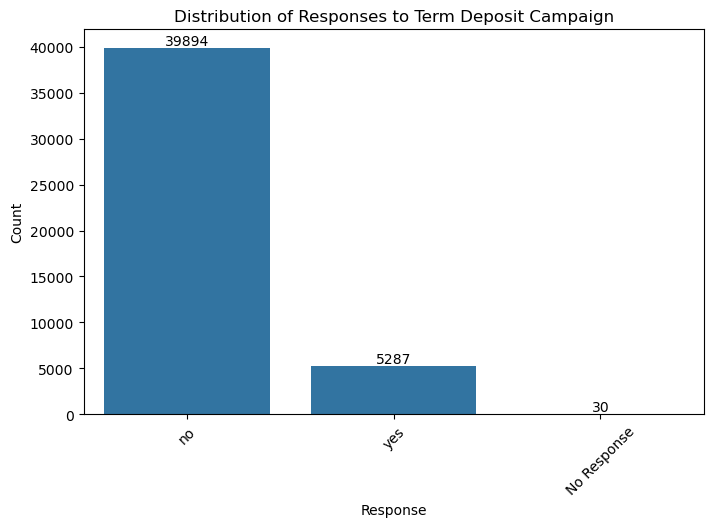

In [21]:
# Examine the distribution of the target variable ('response')
response_distribution = df_marketing_final['response'].value_counts(normalize=True) * 100

print("\nDistribution of Target Variable ('response'):")
print(response_distribution)

# Counting responses
response_counts = df_marketing_final['response'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=response_counts.index, y=response_counts.values)
plt.title('Distribution of Responses to Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

# 3. Univariate Analysis

**a. Examine the distribution of individual key features, such as age, balance, and call duration.**

In [22]:
key_features = ['age', 'balance', 'total_seconds']

# Creating DataFrame to store summaries
summary_df = pd.DataFrame(columns=['Feature', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Missing Values', 'Unique Values'])

# Creating a summary for each key feature
for feature in key_features:
    # Descriptive statistics
    stats = df_marketing_final[feature].describe()
    
# Collecting additional metrics
    skewness = df_marketing_final[feature].skew()
    kurtosis = df_marketing_final[feature].kurtosis()
    missing_values = df_marketing_final[feature].isnull().sum()
    
# Unique values count (for balance)
    unique_values = df_marketing_final[feature].nunique() if feature == 'balance' else None
    
# Creating a new DataFrame for the current feature summary
    feature_summary = pd.DataFrame({
        'Feature': [feature],
        'Count': [stats['count']],
        'Mean': [stats['mean']],
        'Std': [stats['std']],
        'Min': [stats['min']],
        '25%': [stats['25%']],
        '50%': [stats['50%']],
        '75%': [stats['75%']],
        'Max': [stats['max']],
        'Skewness': [skewness],
        'Kurtosis': [kurtosis],
        'Missing Values': [missing_values],
        'Unique Values': [unique_values]
    })
    
# Concatenate only if feature_summary has data
    if not feature_summary.empty:
        summary_df = pd.concat([summary_df, feature_summary], ignore_index=True)

# Display the summary DataFrame
summary_df

,Feature,Count,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis,Missing Values,Unique Values
0,age,45211.0,40.934795,10.616926,18.0,33.0,39.0,48.0,95.0,0.685377,0.321689,0,None
1,balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,8.360308,140.751547,0,7168
2,total_seconds,45211.0,257.929420,257.528105,0.0,103.0,180.0,319.0,4918.0,3.144217,18.153125,0,None


**b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.**

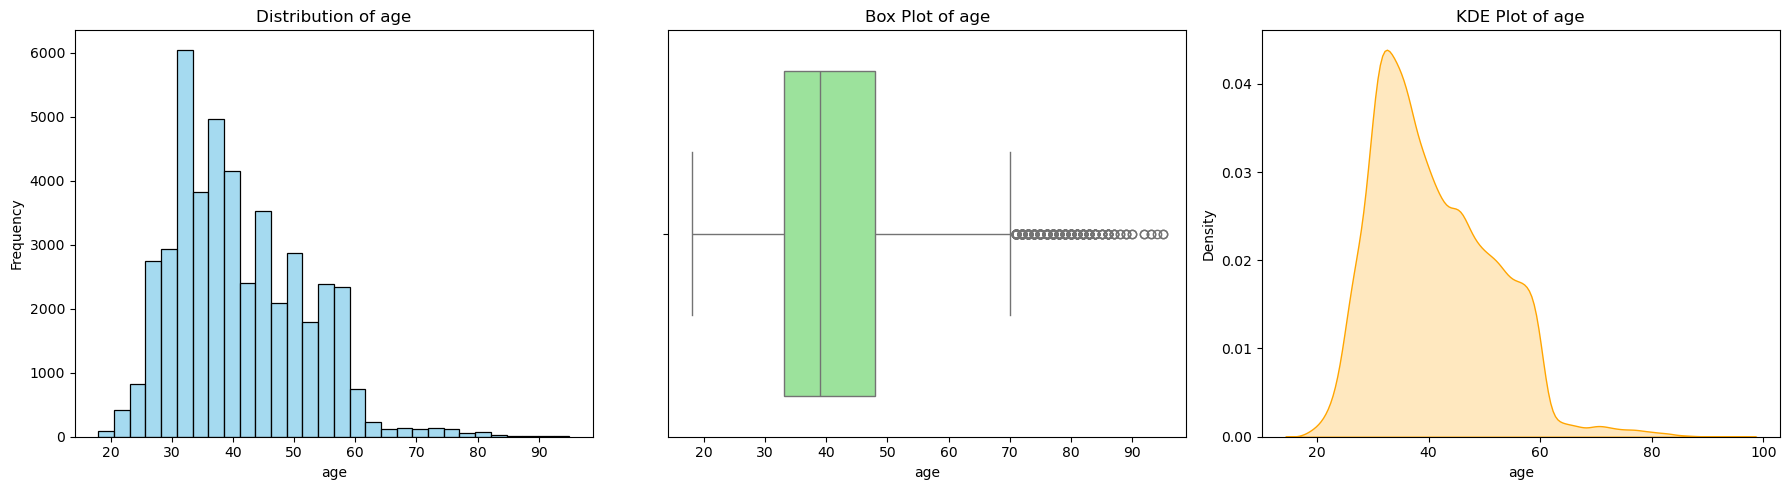

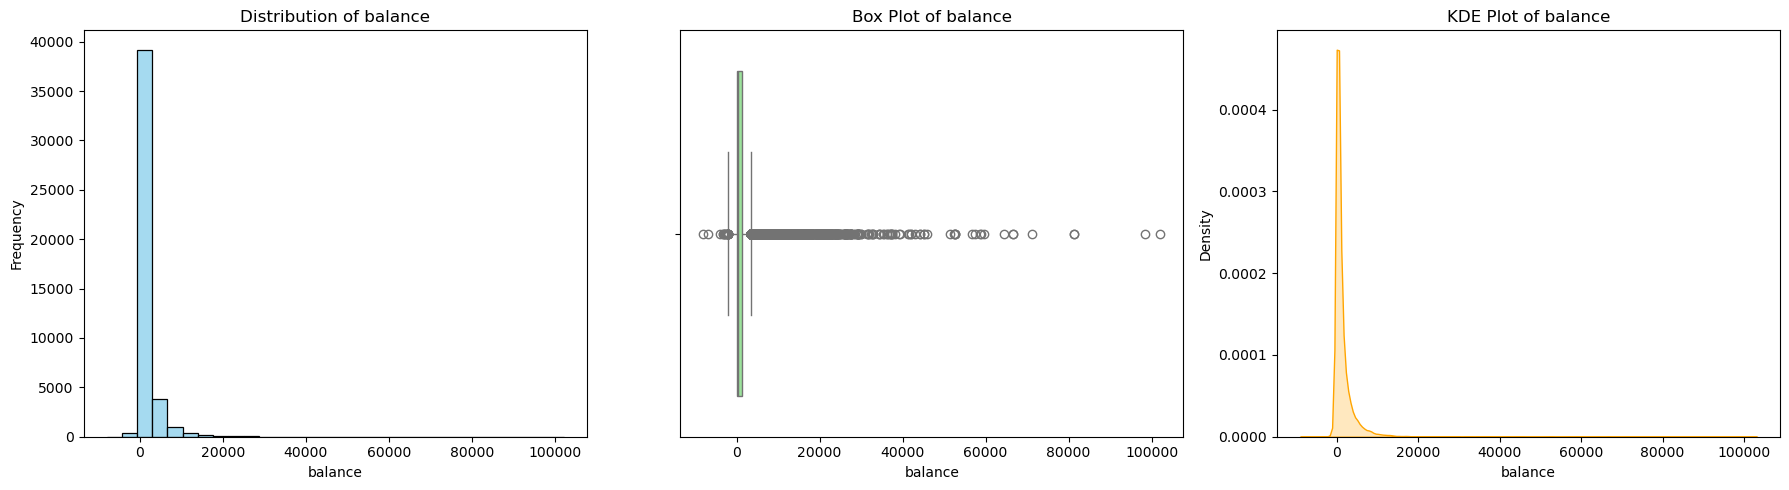

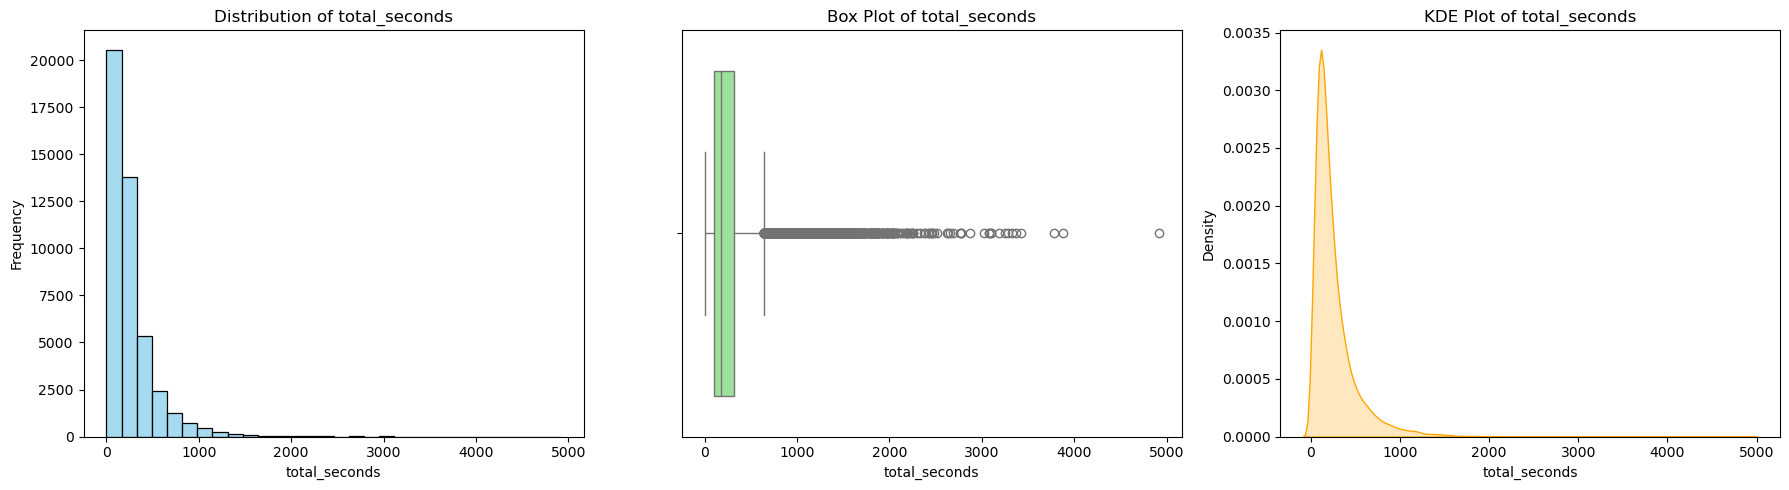

In [23]:
# List of key numeric features for univariate analysis
key_features = ['age', 'balance', 'total_seconds']

# Create subplots for each feature
for feature in key_features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram
    sns.histplot(df_marketing_final[feature], kde=False, bins=30, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df_marketing_final[feature], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Box Plot of {feature}')
    axes[1].set_xlabel(feature)

    # Ensure the feature is numeric
    if pd.api.types.is_numeric_dtype(df_marketing_final[feature]):
        # KDE Plot
        sns.kdeplot(df_marketing_final[feature], fill=True, color='orange', ax=axes[2]) 
        axes[2].set_title(f'KDE Plot of {feature}')
        axes[2].set_xlabel(feature)
        axes[2].set_ylabel('Density')
    else:
        axes[2].text(0.5, 0.5, 'Data is not numeric', fontsize=12, ha='center', va='center')
        axes[2].set_title(f'KDE Plot of {feature}')
        axes[2].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

In [24]:
# Expected Results:
# Histograms will show the distribution and whether the features are normally distributed, skewed, or have multiple modes.
# Box plots will indicate the presence of outliers in features like balance and duration.
# KDE plots will offer a smooth alternative to histograms, highlighting the general shape of the distribution.

# 4. Bivariate Analysis

**a. Evaluate the relationship between independent variables and the target variable.**

In [25]:
# Create a temporary DataFrame by dropping specified columns
temp_df = df_marketing_final.drop(columns=['customerid', 'duration', 'marital'])

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column in the temporary DataFrame
for column in temp_df.select_dtypes(include=['object']).columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column])

# Calculate the correlation matrix
corr_matrix = temp_df.corr()

# Display the correlation with the target variable 'response', sorted in descending order
target_correlation = corr_matrix['response'].sort_values(ascending=False)
target_correlation

response           1.000000
total_seconds      0.392694
pdays              0.103311
previous           0.092960
education          0.066192
balance            0.053111
jobedu             0.043685
job                0.040387
age                0.025002
salary             0.019837
default           -0.022037
month             -0.024537
day               -0.027880
marital_numeric   -0.065482
loan              -0.068091
targeted          -0.068554
campaign          -0.073373
poutcome          -0.077483
housing           -0.138815
contact           -0.147950
Name: response, dtype: float64

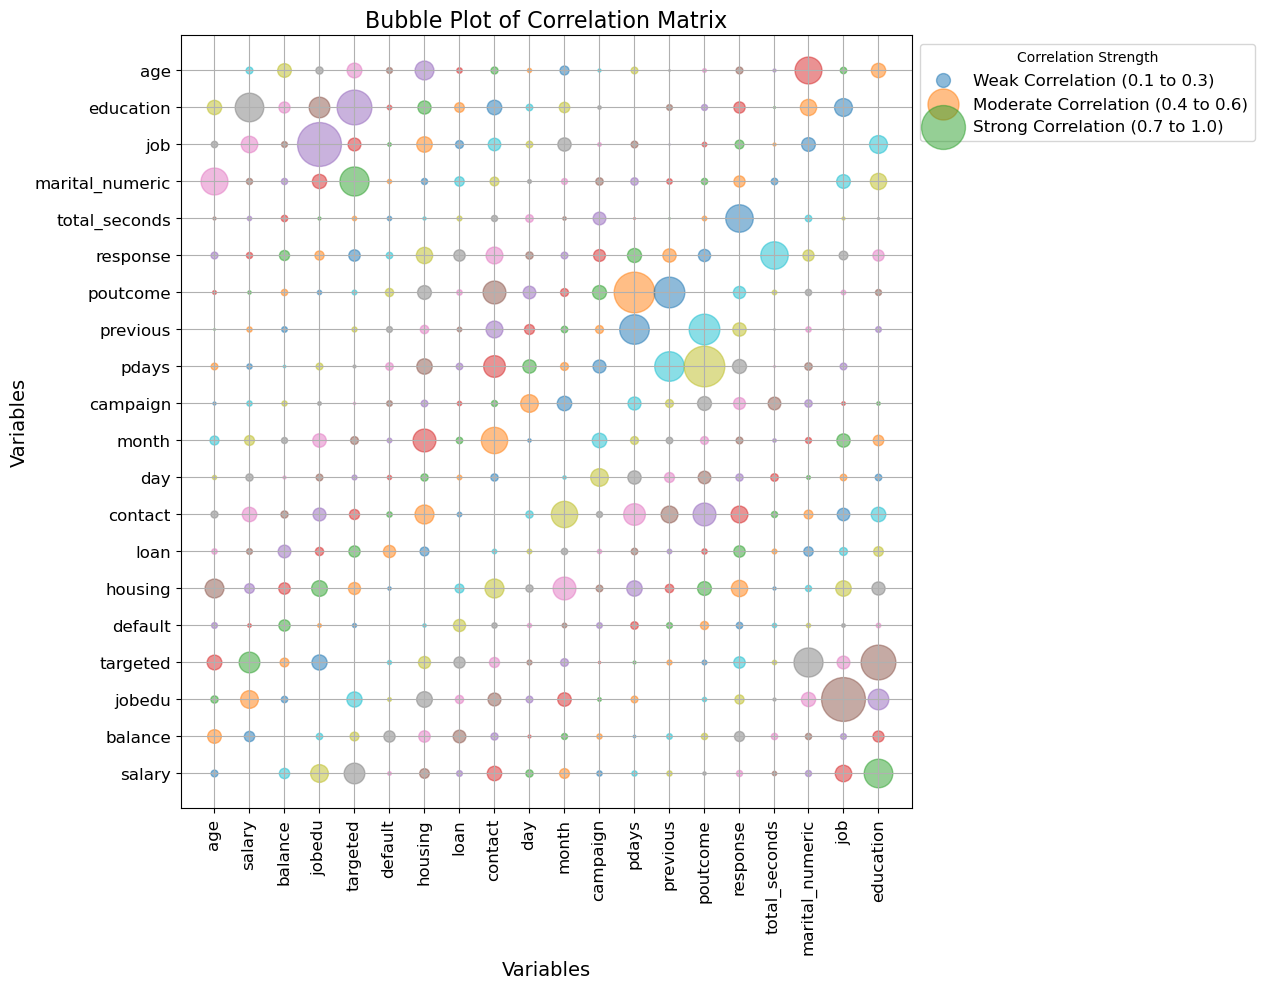

In [26]:
# Visualization
# Create a bubble plot for the correlation matrix
plt.figure(figsize=(15, 10))  # Increased figure size for better screen utilization
correlations = temp_df.corr()

# Create scatter plot with bubbles
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        if i != j:
            size = abs(correlations.iloc[i, j]) * 1000  # Size based on correlation strength
            plt.scatter(x=correlations.columns[i], y=correlations.columns[j],
                        s=size, alpha=0.5)

# Create custom legend for bubble sizes
sizes = [100, 500, 1000]  # Sizes for legend
labels = ['Weak Correlation (0.1 to 0.3)', 
          'Moderate Correlation (0.4 to 0.6)', 
          'Strong Correlation (0.7 to 1.0)']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size, alpha=0.5, label=label)

plt.title('Bubble Plot of Correlation Matrix', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.grid()

# Display the legend outside the plot
plt.legend(title='Correlation Strength', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

**b. Analyze how features like age, job type, education, marital status, etc. associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.**

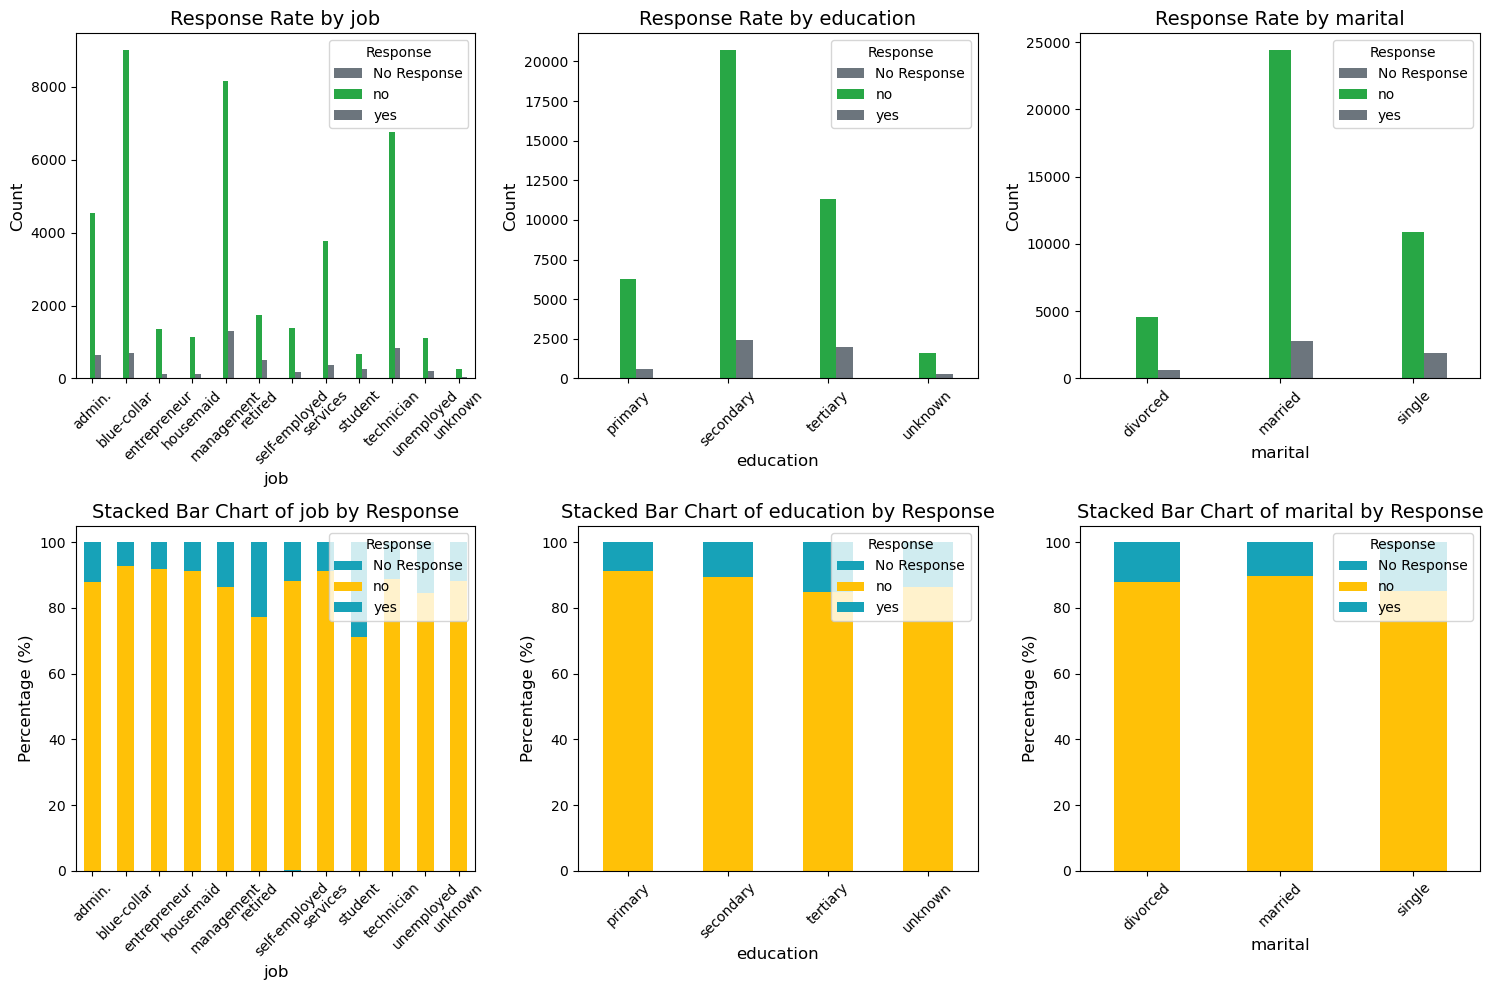

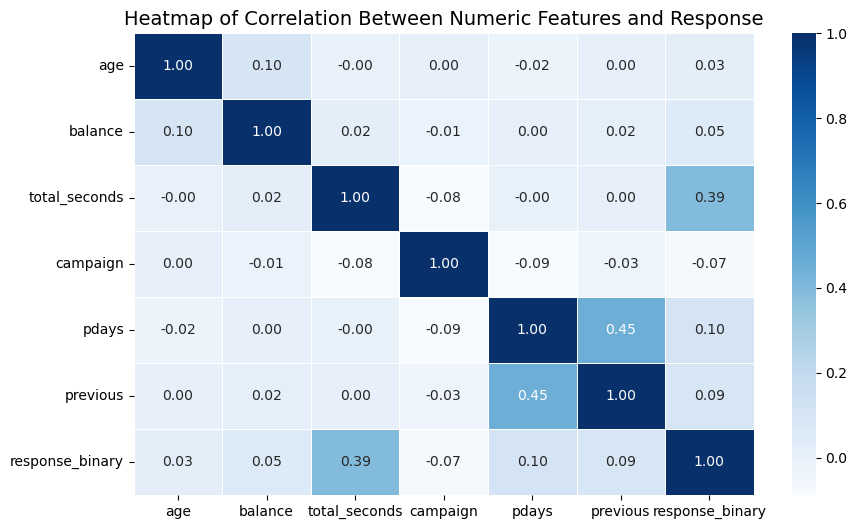

In [27]:
# Create response_binary column
df_marketing_final['response_binary'] = df_marketing_final['response'].map({'yes': 1, 'no': 0})

# Define categorical and numeric features
categorical_features = ['job', 'education', 'marital']
numeric_features = ['age', 'balance', 'total_seconds', 'campaign', 'pdays', 'previous']

# Set up the figure for bar charts and stacked bar charts
fig, axes = plt.subplots(2, len(categorical_features), figsize=(15, 10))

# 1. Bar Charts for Categorical Features
for i, feature in enumerate(categorical_features):
    counts = df_marketing_final.groupby([feature, 'response']).size().unstack(fill_value=0)
    counts.plot(kind='bar', ax=axes[0, i], color=['#6C757D', '#28A745'])  # Presentable colors
    axes[0, i].set_title(f'Response Rate by {feature}', fontsize=14)
    axes[0, i].set_xlabel(feature, fontsize=12)
    axes[0, i].set_ylabel('Count', fontsize=12)
    axes[0, i].legend(title='Response', fontsize=10)
    axes[0, i].tick_params(axis='x', rotation=45)

# 2. Stacked Bar Charts for Categorical Features
for i, feature in enumerate(categorical_features):
    crosstab_data = pd.crosstab(df_marketing_final[feature], df_marketing_final['response'], normalize='index') * 100
    crosstab_data.plot(kind='bar', stacked=True, ax=axes[1, i], color=['#17A2B8', '#FFC107'])  # Presentable colors
    axes[1, i].set_title(f'Stacked Bar Chart of {feature} by Response', fontsize=14)
    axes[1, i].set_xlabel(feature, fontsize=12)
    axes[1, i].set_ylabel('Percentage (%)', fontsize=12)
    axes[1, i].tick_params(axis='x', rotation=45)
    axes[1, i].legend(title='Response', fontsize=10, loc='upper right')

# Adjust layout for the bar charts
plt.tight_layout()
plt.show()

# 3. Heatmap for Numeric Features
numeric_columns = numeric_features + ['response_binary']
correlation_matrix = df_marketing_final[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Between Numeric Features and Response', fontsize=14)
plt.show()

In [28]:
# Explanation:
# Bar Charts:

# For each categorical feature (e.g., job, marital, education), we use a countplot() to display the count of responses (yes or no) for each category.
# This helps to understand which job types or educational levels have higher response rates to the campaign.
# Stacked Bar Charts:

# We create stacked bar charts that show the percentage of responses (yes or no) within each category of the independent variables.
# This visualization allows us to see how much each group contributed to the overall success of the campaign.
# Heat Map (Correlation Between Numeric Features and Response):

# We convert the response to a binary format (yes = 1, no = 0) and then calculate the correlation matrix for numeric features and the binary response.
# The heatmap visualizes the correlation values, which helps identify if numeric variables like age, balance, or
# duration have a strong relationship with the target.
# What to Expect:
# Bar Charts: You’ll see which categories (job, education, marital status) are more likely to respond positively to the campaign.
# Stacked Bar Charts: This visualization shows the percentage distribution of responses across categories.
# Heat Map: This will indicate correlations between numeric features and the target variable.
# For example, you might see a positive correlation between duration of calls and the success of the campaign.
# These visualizations will give you a detailed understanding of how the independent variables associate with the campaign’s success.

# 5. Categorical Variables Analysis 

**a. Investigate the distribution of categorical variables such as job type, education, and marital status.**

     Variable       Category  Count  Percentage
0         job    blue-collar   9732   21.525735
1         job     management   9458   20.919688
2         job     technician   7597   16.803433
3         job         admin.   5171   11.437482
4         job       services   4154    9.188029
5         job        retired   2264    5.007631
6         job  self-employed   1579    3.492513
7         job   entrepreneur   1487    3.289023
8         job     unemployed   1303    2.882042
9         job      housemaid   1240    2.742695
10        job        student    938    2.074716
11        job        unknown    288    0.637013
12  education      secondary  23202   51.319369
13  education       tertiary  13301   29.419831
14  education        primary   6851   15.153392
15  education        unknown   1857    4.107407
16    marital        married  27214   60.193316
17    marital         single  12790   28.289576
18    marital       divorced   5207   11.517109


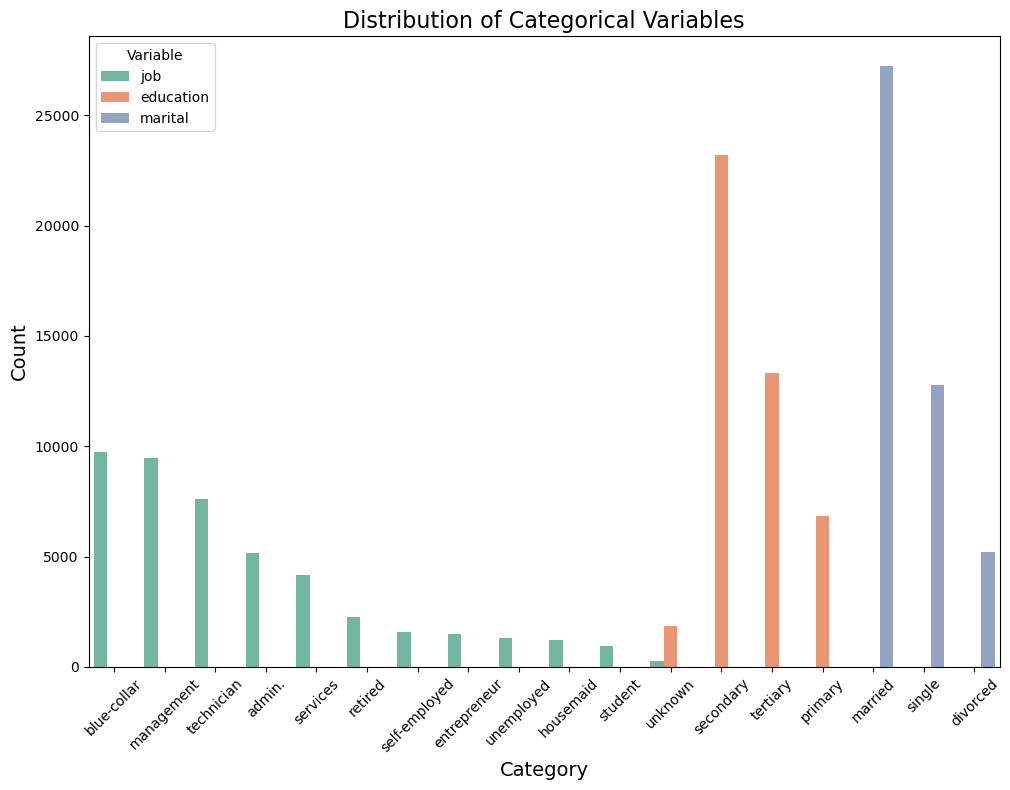

In [29]:
# Define categorical variables
categorical_variables = ['job', 'education', 'marital']

# Initialize a list to hold individual DataFrames
dataframes = []

# Calculate distribution for each categorical variable
for variable in categorical_variables:
    # Count occurrences
    counts = df_marketing_final[variable].value_counts()
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Combine counts and percentages into a DataFrame
    df_variable = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    df_variable['Variable'] = variable  # Add variable name for identification
    dataframes.append(df_variable)

# Concatenate all individual DataFrames into one
result = pd.concat(dataframes, ignore_index=True)

# Rearranging columns for better presentation
result = result[['Variable', 'Category', 'Count', 'Percentage']]
print(result)

# Plotting
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=result, x='Category', y='Count', hue='Variable', palette='Set2')

# Adding titles and labels
plt.title('Distribution of Categorical Variables', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for labels
plt.show()

**b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.**

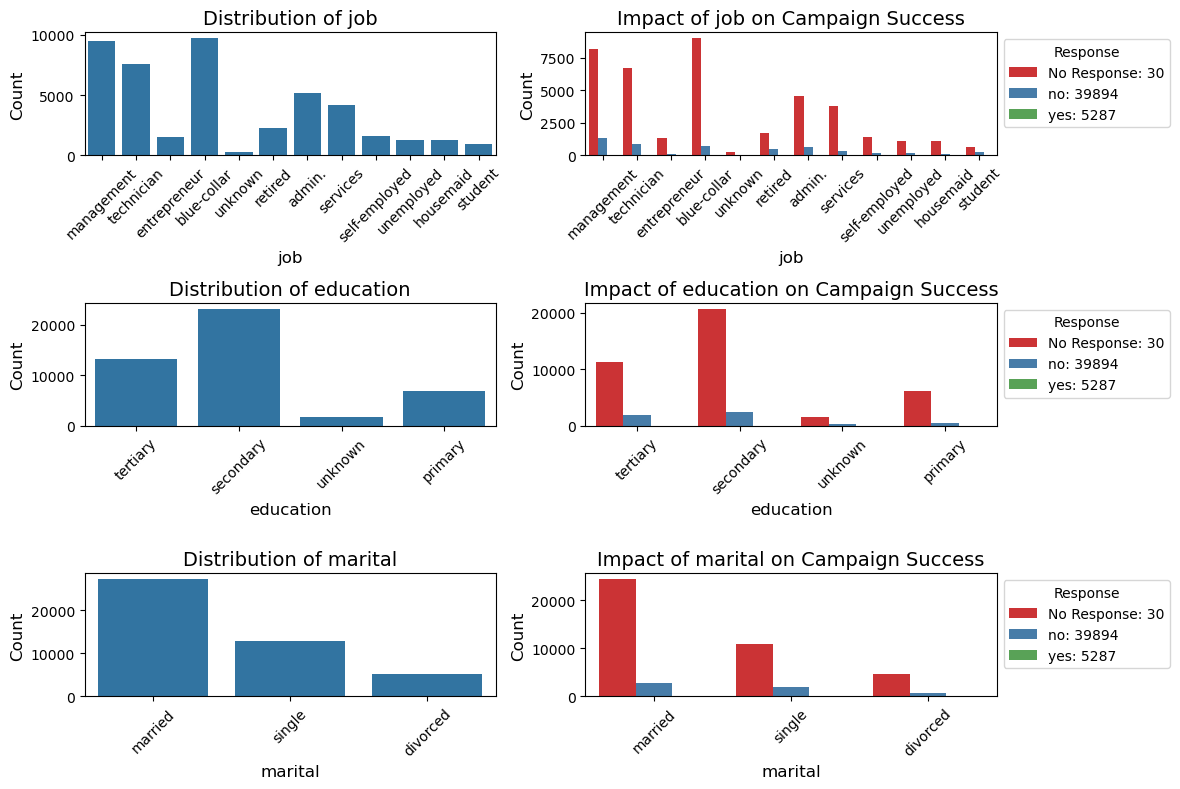

In [30]:
# Defining categorical variables to investigate
categorical_variables = ['job', 'education', 'marital']

# Plotting
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(14, 8))

# 1. Plot the distribution of each categorical variable
for i, feature in enumerate(categorical_variables):

# Distribution plot without hue
    sns.countplot(x=feature, data=df_marketing_final, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)

# Impact on campaign success with hue
    bar_plot = sns.countplot(x=feature, hue='response', data=df_marketing_final, ax=axes[i, 1], palette='Set1')
    axes[i, 1].set_title(f'Impact of {feature} on Campaign Success', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)
    axes[i, 1].set_ylabel('Count', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)

# Create a dictionary to hold counts for the legend
    response_counts = df_marketing_final.groupby(['response', feature]).size().unstack(fill_value=0)

# Prepare custom legend with counts
    custom_legend = []
    for response in response_counts.index:
        total_count = response_counts.loc[response].sum()
        custom_legend.append(f'{response}: {total_count}')

    # Adding a custom legend outside the plot
    axes[i, 1].legend(custom_legend, title='Response', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [31]:
# Explanation:
# Distribution of Categorical Variables:

# We use countplot() to visualize the distribution of categorical variables like job, marital, and education. This shows how many clients fall into each category, giving a sense of the composition of the dataset.
# Impact on Campaign Success:

# We analyze how each categorical variable affects the response to the campaign by plotting the counts of "yes" and "no" for each category. The visual comparison helps determine if certain categories (e.g., specific job types or educational levels) are more likely to respond positively to the term deposit campaign.
# What to Expect:
# Distribution Plots: These will show how the dataset is distributed across various job types, marital statuses, and education levels.
# Impact on Success: You’ll be able to see if certain groups (e.g., those with certain jobs or education levels) tend to respond more positively to the marketing campaign.
# These insights will help identify patterns and understand which categorical groups are more receptive to the term deposit offers.

# 6.Temporal Analysis

**a. Investigate temporal patterns in the success of the campaign over time.**


Monthly Success Rates:
response  year month_abbr  yes     no  Success Rate (%)
0         2017        Apr  577   2352         19.699556
1         2017        Aug  688   5547         11.034483
2         2017        Dec  100    114         46.728972
3         2017        Feb  439   2206         16.597353
4         2017        Jan  142   1260         10.128388
5         2017        Jul  626   6260          9.090909
6         2017        Jun  544   4785         10.208294
7         2017        Mar  247    229         51.890756
8         2017        May  930  12858          6.744996
9         2017        Nov  403   3560         10.169064
10        2017        Oct  323    415         43.766938
11        2017        Sep  268    308         46.527778


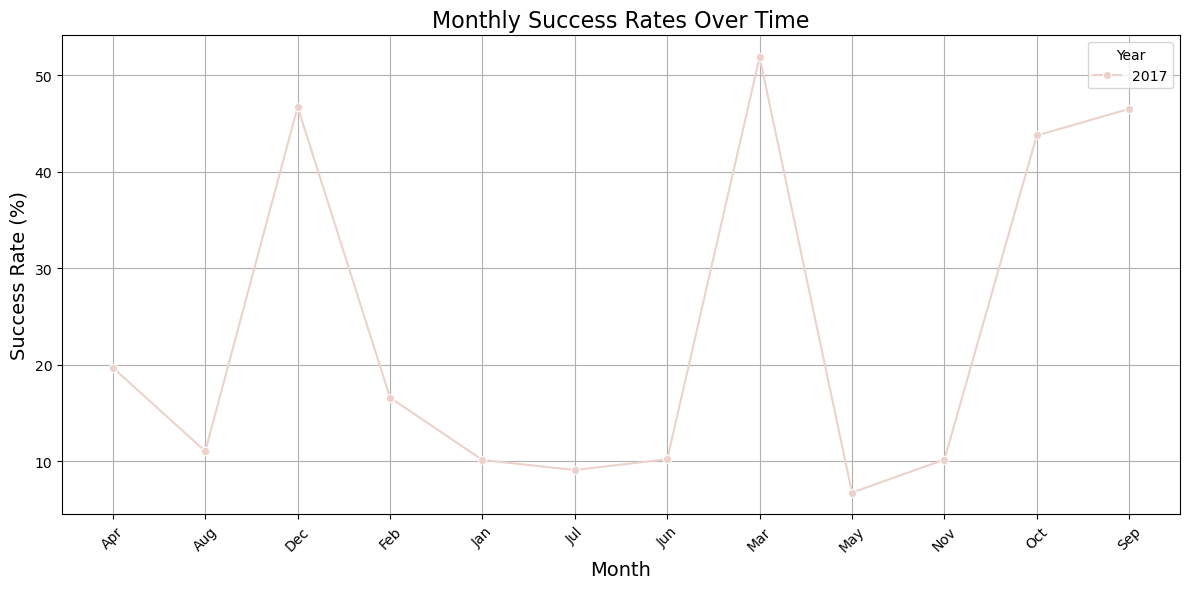

In [32]:
# Create a new 'month_year' column by converting 'month' to datetime
df_marketing_final['month_year'] = pd.to_datetime(df_marketing_final['month'], format='%b, %Y', errors='coerce')

# Extract abbreviated month and year
df_marketing_final['month_abbr'] = df_marketing_final['month_year'].dt.strftime('%b')
df_marketing_final['year'] = df_marketing_final['month_year'].dt.year

# # Show the extracted columns
# extracted_columns = df_marketing_final[['month_abbr', 'year', 'response']]
# print("Extracted Columns:")
# print(extracted_columns)

# Group by year and month, then count responses
monthly_success = df_marketing_final.groupby(['year', 'month_abbr', 'response']).size().unstack(fill_value=0)

# Calculate success rate (considering only 'yes' and 'no' responses)
monthly_success['Success Rate (%)'] = (monthly_success.get('yes', 0) / 
                                        (monthly_success.get('yes', 0) + monthly_success.get('no', 0) )) * 100

#  Reset the index for better display
monthly_success = monthly_success.reset_index()

# Display results
print("\nMonthly Success Rates:")
print(monthly_success[['year', 'month_abbr', 'yes', 'no', 'Success Rate (%)']])

# Visualisation
# Plotting the success rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_success, x='month_abbr', y='Success Rate (%)', hue='year', marker='o')

# Adding titles and labels
plt.title('Monthly Success Rates Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

**b. Analyze if specific months or days exhibit superior campaign performance.**

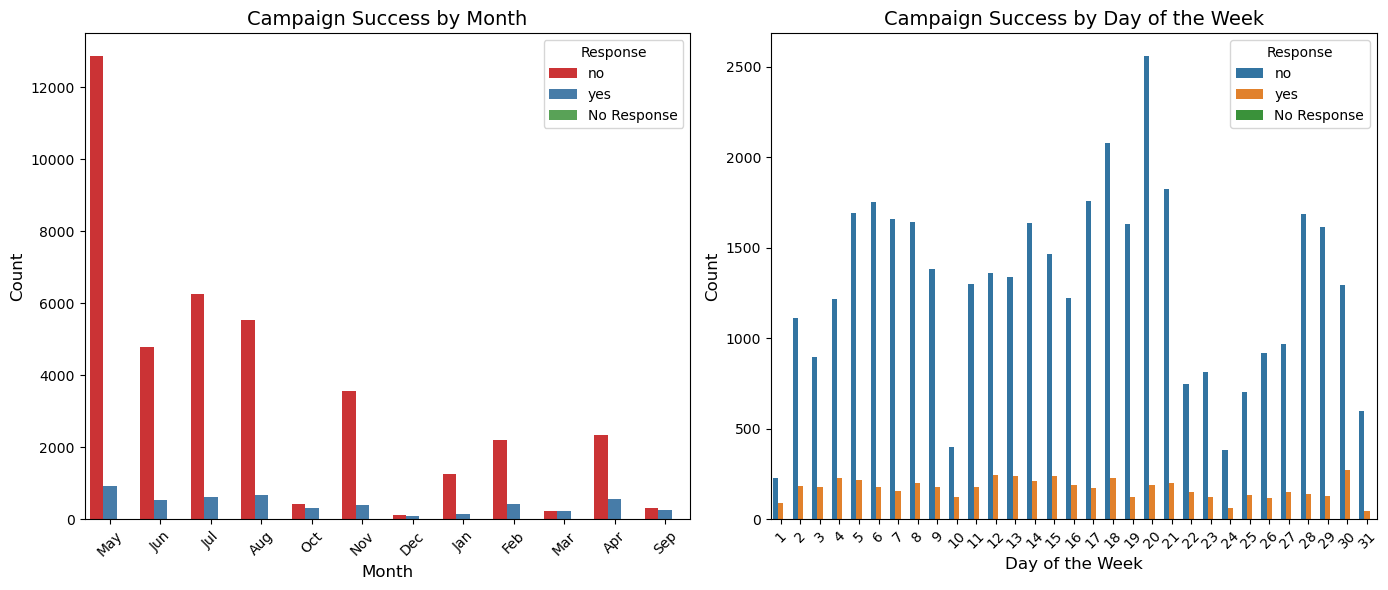

In [33]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Campaign Success by Month
sns.countplot(x='month_abbr', hue='response', data=df_marketing_final, palette='Set1', ax=axes[0])
axes[0].set_title('Campaign Success by Month', fontsize=14)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Response')
axes[0].tick_params(axis='x', rotation=45)

# Campaign Success by Day of the Week
sns.countplot(x='day', hue='response', data=df_marketing_final, ax=axes[1])
axes[1].set_title('Campaign Success by Day of the Week', fontsize=14)
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Response')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [34]:
# Explanation:
# Success by Month:

# We use countplot() to visualize how the response rate (positive or negative) varies by month. 
# This will help us see if there are certain months in which the campaign was more successful.
# Success by Day of the Week:

# Similarly, a countplot() is used to show how success is distributed across days of the week.
# This can help identify if certain days (e.g., Mondays, weekends) have better success rates.
# Month and Day Extraction (if needed):

# If the dataset does not already have columns like month or day_of_week, you can extract them from the date or
# contact_date column (if available) using pd.to_datetime().

# What to Expect:
# Success by Month: You may observe if certain months (e.g., summer or end-of-quarter months) have higher response rates.
# This can give insights into seasonal trends.
# Success by Day of the Week:
# The analysis could reveal whether customers are more likely to respond on certain days, such as during weekdays or weekends

# 7. Feature Engineering 

**a. Introduce new features that may enhance prediction, such as creating age groups or income categories.**

   age    age_group  salary income_category
0   58       Senior  100000            High
1   44  Middle-aged   60000            High
2   33  Middle-aged  120000            High
3   47  Middle-aged   20000            High
4   33  Middle-aged       0             Low


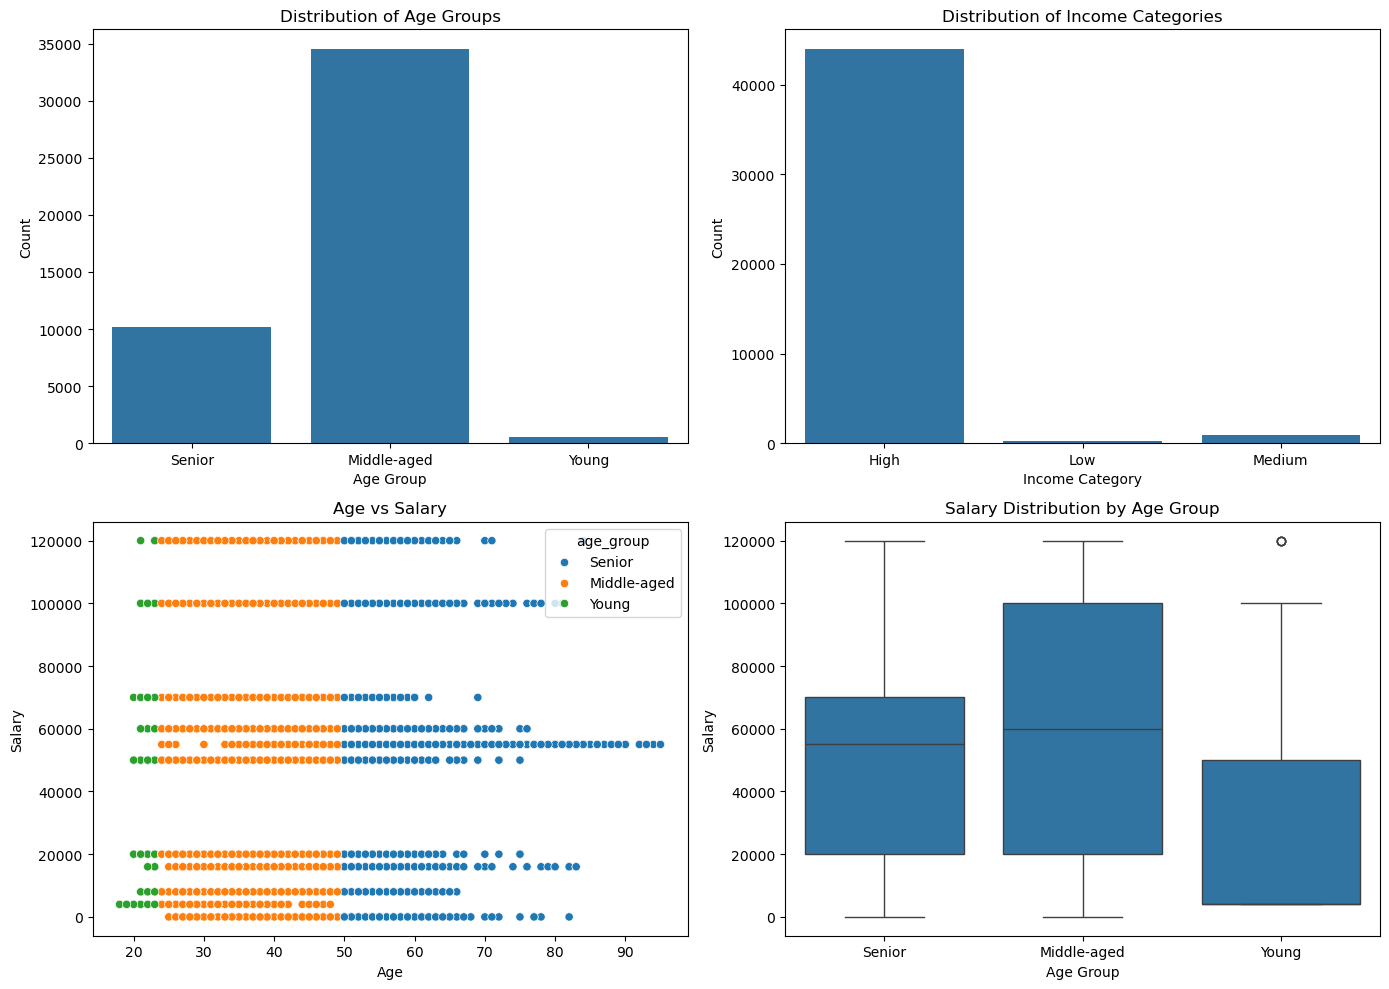

In [35]:
# Creating Age Groups
def age_group(age):
    if age < 24:
        return 'Young'
    elif 24 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply age group categorization
df_marketing_final['age_group'] = df_marketing_final['age'].apply(age_group)

# Creating Income Categories based on salary
def income_category(salary):
    if salary < 2000:
        return 'Low'
    elif 2000 <= salary < 5000:
        return 'Medium'
    else:
        return 'High'

# Applying income category categorization
df_marketing_final['income_category'] = df_marketing_final['salary'].apply(income_category)

# Show the updated DataFrame with new features
print(df_marketing_final[['age', 'age_group', 'salary', 'income_category']].head())

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Create a bar chart for age groups
sns.countplot(x='age_group', data=df_marketing_final, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age Groups')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Count')

# Create a bar chart for income categories
sns.countplot(x='income_category', data=df_marketing_final, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Income Categories')
axs[0, 1].set_xlabel('Income Category')
axs[0, 1].set_ylabel('Count')

# Create a scatter plot to visualize the relationship between age and salary
sns.scatterplot(x='age', y='salary', hue='age_group', data=df_marketing_final, ax=axs[1, 0])
axs[1, 0].set_title('Age vs Salary')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Salary')

# Create a box plot to show the distribution of salary within each age group
sns.boxplot(x='age_group', y='salary', data=df_marketing_final, ax=axs[1, 1])
axs[1, 1].set_title('Salary Distribution by Age Group')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
# Explanation:
# Age Groups:
# We create a function age_group() that assigns an age group based on the age column.
# The apply() function is used to apply this to each row in the dataset.
# Example categories could be "Young" (< 24), "Middle-aged" (30–49), and "Senior" (50+).

# Income Categories:
# We define income categories based on the salary column (assuming salary is numeric). For simplicity, we categorize salary as "Low", "Medium", or "High". You can adjust these thresholds based on your domain knowledge or data distribution.
# Label Encoding:

# We use LabelEncoder from sklearn.preprocessing to transform categorical variables (job, education, marital, etc.) into numeric values.
# Label encoding assigns each category a unique number. This is useful for many models (like decision trees) that can handle numeric data.

**b. Apply encoding techniques to transform categorical variables if necessary.**

In [37]:
# Optional: One-Hot Encoding
# If you're working with models that can't handle categorical data directly (like linear models or neural networks),
# One-Hot Encoding can be used instead of label encoding. This creates binary columns for each category.

In [38]:
# Display the current columns to check for any discrepancies
print("Current columns in df_marketing_final:")
print(df_marketing_final.columns.tolist())

# One-Hot Encoding for selected categorical features
# Make sure the column names are correct
columns_to_encode = ['job', 'education', 'marital', 'contact', 'day', 'age_group', 'income_category']

# Check for the existence of columns to avoid KeyError
existing_columns = [col for col in columns_to_encode if col in df_marketing_final.columns]

# Perform one-hot encoding and create a new DataFrame
df_onehot_encode = pd.get_dummies(df_marketing_final, columns=existing_columns, drop_first=True)

# Show the updated DataFrame with One-Hot Encoding
print("\nUpdated DataFrame after One-Hot Encoding:")
df_onehot_encode.head()

Current columns in df_marketing_final:
['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'total_seconds', 'marital_numeric', 'job', 'education', 'response_binary', 'month_year', 'month_abbr', 'year', 'age_group', 'income_category']

Updated DataFrame after One-Hot Encoding:


,customerid,age,salary,balance,jobedu,targeted,default,housing,loan,month,...,day_26,day_27,day_28,day_29,day_30,day_31,age_group_Senior,age_group_Young,income_category_Low,income_category_Medium
0,1,58,100000,2143,"management,tertiary",yes,no,yes,no,"may, 2017",...,False,False,False,False,False,False,True,False,False,False
1,2,44,60000,29,"technician,secondary",yes,no,yes,no,"may, 2017",...,False,False,False,False,False,False,False,False,False,False
2,3,33,120000,2,"entrepreneur,secondary",yes,no,yes,yes,"may, 2017",...,False,False,False,False,False,False,False,False,False,False
3,4,47,20000,1506,"blue-collar,unknown",no,no,yes,no,"may, 2017",...,False,False,False,False,False,False,False,False,False,False
4,5,33,0,1,"unknown,unknown",no,no,no,no,"may, 2017",...,False,False,False,False,False,False,False,False,True,False


In [39]:
# What to Expect:
# New Features: You will have new columns like age_group and income_category that categorize customers into specific groups.
# Encoded Columns: Categorical variables like job, education, and marital will be transformed into numerical values, making them suitable for machine learning models.
# One-Hot Encoding: If applied, each unique category within a column will be represented as a binary column, improving model performance for algorithms like linear regression or neural networks.
# Next Steps:
#     After feature engineering, you can use these newly created features to train a model and evaluate its performance.
# If you're preparing for model training, ensure the target variable (response) is encoded as well (e.g., "yes" = 1, "no" = 0).

# 8. Correlation Analysis

**a. Examine correlations between independent variables to identify multicollinearity.**

In [40]:
# Calculate the Correlation Matrix: For all numeric features.
# Check for High Correlations: Identify features that have a correlation greater than a threshold (typically, 0.7 or -0.7).
# Correlation with Target Variable: Specifically, check how features correlate with the target variable (response_binary).

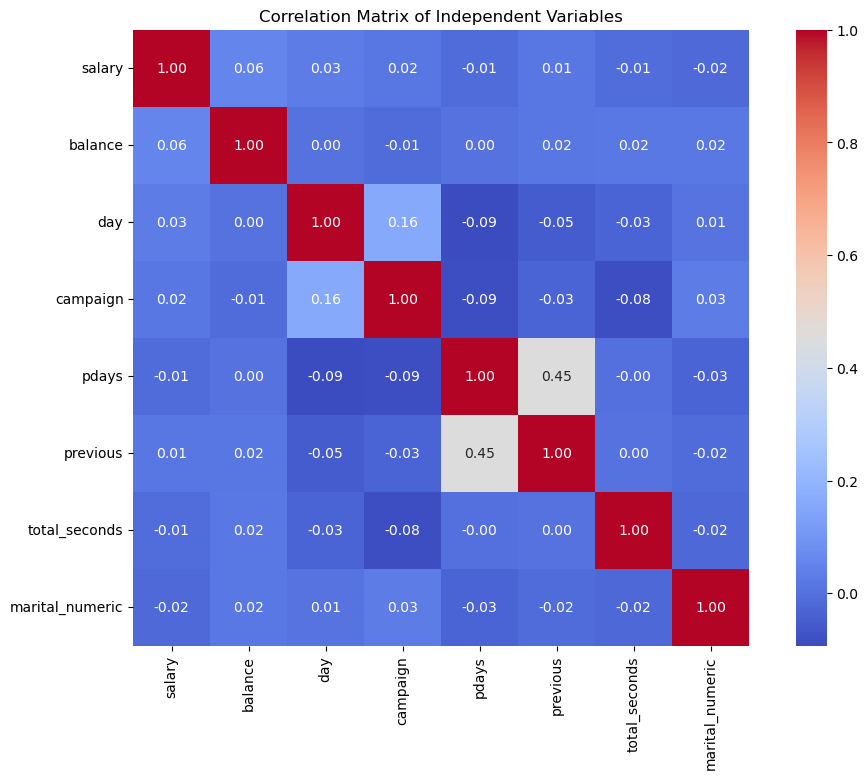

No highly correlated pairs found above the threshold.


In [41]:
# Create a temporary DataFrame from df_marketing_final for analysis
df_temp = df_marketing_final.copy()

# Drop the target variable and non-numeric columns for correlation analysis
X = df_temp.drop(columns=['response', 'response_binary', 'customerid'])

# Select only numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = X_numeric.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Identify highly correlated variables
threshold = 0.7
high_correlation = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Display highly correlated pairs, removing NaN values
highly_correlated_pairs = high_correlation.stack().reset_index()
highly_correlated_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter out NaN pairs
highly_correlated_pairs = highly_correlated_pairs.dropna()

# Display results
if not highly_correlated_pairs.empty:
    print("Highly correlated pairs:")
    print(highly_correlated_pairs)
else:
    print("No highly correlated pairs found above the threshold.")

In [42]:
# Explanation:
# Correlation Matrix:
# We calculate the correlation matrix using corr(), which shows the Pearson correlation between every pair of numeric variables.
# The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 meaning no linear correlation.

# Visualization:

# The heatmap displays the correlation matrix visually. It will help you identify highly correlated features at a glance.
# The annot=True parameter will display the correlation values on the heatmap.
# High Correlation Filtering:

# We filter out pairs of features that have a correlation above 0.7 or below -0.7, as these may indicate multicollinearity.
# You can adjust the threshold depending on your dataset or domain knowledge.
# Correlation with the Target:

# We extract and sort the correlation values with respect to the target variable (response_binary).
# This will give you an idea of how strongly each feature is associated with the target.

In [43]:
# What to Expect:
# Heatmap: A color-coded matrix of correlations, where darker colors indicate stronger correlations. You will be able to see which features are strongly correlated with each other.
# Highly Correlated Features: The output will show pairs of features that are highly correlated with each other.
# If any such pair exists, you may need to consider removing one of the features to reduce multicollinearity.
# Correlation with Target: The sorted correlation list will show how strongly each feature correlates with the target variable. 
# Features with higher correlations (positive or negative) are typically more influential in predicting the target.

**b. Evaluate how correlated features may influence the target variable.**

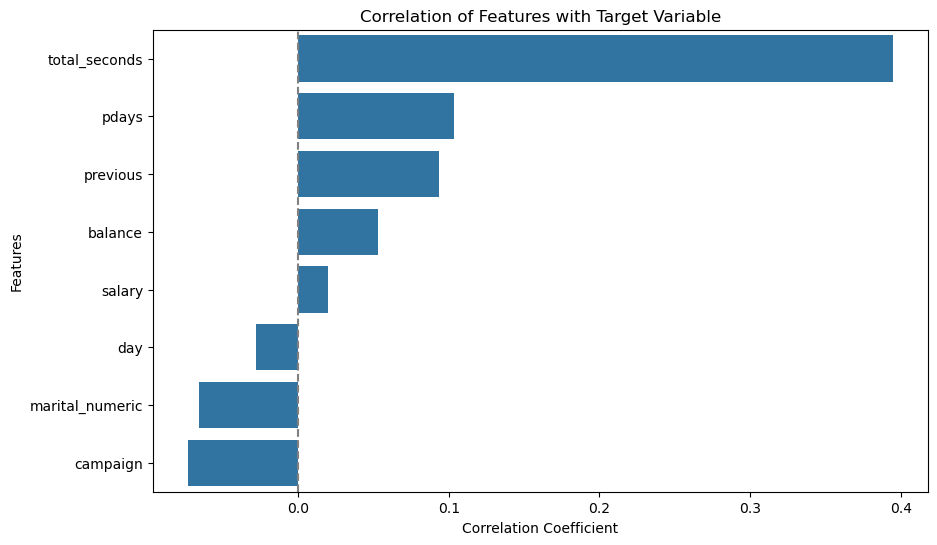

Correlation of Features with Target Variable:


,Feature,Correlation with Target
6,total_seconds,0.394567
4,pdays,0.103726
5,previous,0.093294
1,balance,0.052850
0,salary,0.020042
2,day,-0.028306
7,marital_numeric,-0.065641
3,campaign,-0.073176


In [44]:
# Create a temporary DataFrame from df_marketing_final for analysis
df_temp = df_marketing_final.copy()

# Encode the target variable if not done already
df_temp['response_binary'] = df_temp['response'].map({'yes': 1, 'no': 0})

# Drop non-numeric columns and the original response variable
X = df_temp.drop(columns=['response', 'response_binary', 'customerid'])

# Select only numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation of features with the target variable
correlation_with_target = X_numeric.corrwith(df_temp['response_binary'])

# Create a DataFrame for easier plotting
correlation_df = correlation_with_target.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Target']

# Sort the DataFrame by correlation values
correlation_df = correlation_df.sort_values(by='Correlation with Target', ascending=False)

# Visualize the correlations with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Target', y='Feature', data=correlation_df)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Display correlation values
print("Correlation of Features with Target Variable:")
correlation_df

# 9. Outlier Detection and Handling

In [45]:
# a. Outlier Detection:
# There are several methods to detect outliers in the data:

# Z-Score: For normally distributed data, a Z-score tells you how many standard deviations a data point is from the mean.
# Typically, a Z-score greater than 3 (or less than -3) is considered an outlier.
# IQR (Interquartile Range): This method uses the 25th percentile (Q1) and 75th percentile (Q3) to calculate the IQR.
# Outliers are typically defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
# Visual Inspection: Box plots and scatter plots are useful tools for detecting outliers visually.

# b. Handling Outliers:

# Removing Outliers: If outliers are very extreme and erroneous, we may decide to remove them.
# Capping: You can cap outliers by setting a threshold above and below which values are clipped.
# Transforming Data: In some cases, applying transformations (like log transformation) can reduce the effect of outliers.

# Steps:
# Detect Outliers Using Z-Score and IQR
# Visualize Outliers Using Box Plots
# Handle Outliers (Remove, Cap, or Transform)

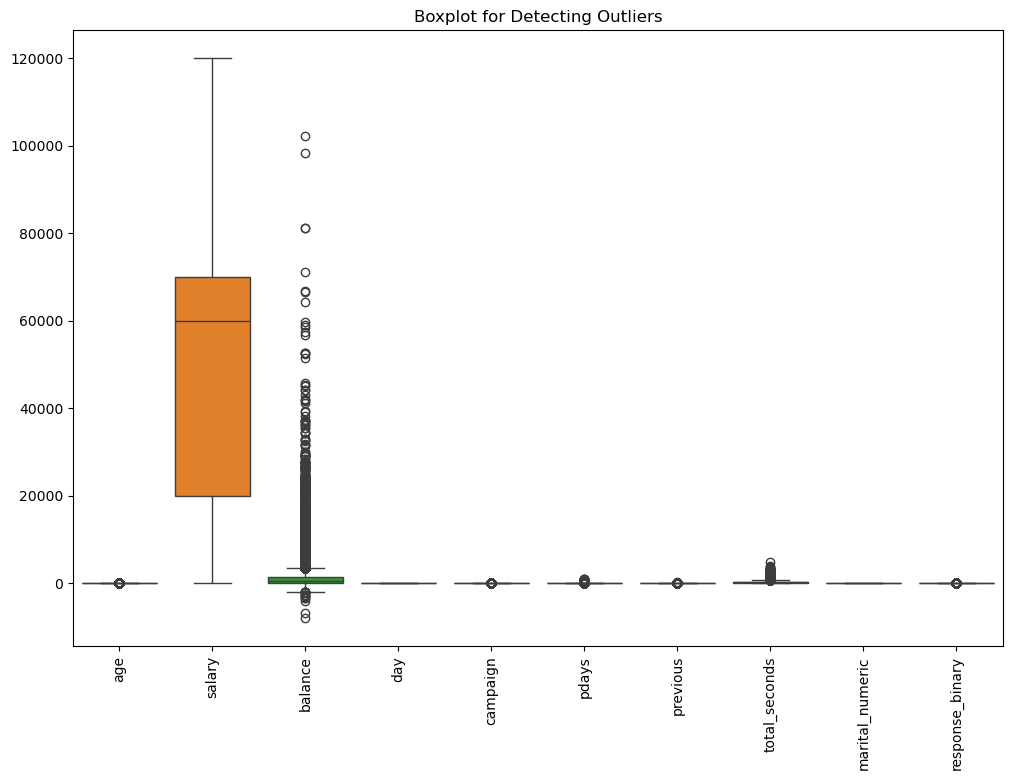


Summary of Outliers Detected:


,Feature,Outliers_ZScore,Outliers_IQR
age,age,381,487
salary,salary,0,0
balance,balance,745,4729
day,day,0,0
campaign,campaign,840,3064
pdays,pdays,1723,8257
previous,previous,582,8257
total_seconds,total_seconds,961,3225
marital_numeric,marital_numeric,0,0
response_binary,response_binary,0,5287


In [46]:
# Create a temporary DataFrame from df_marketing_final
df_temp = df_marketing_final.drop(columns=['customerid', 'year'])

# 1. Z-Score Method: Detect outliers for numeric features
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df_temp[numeric_columns]))

# Find outliers with Z-score > 3 (commonly used threshold)
outliers_zscore = (z_scores > 3)

# 2. IQR Method: Detect outliers using IQR for numeric features
Q1 = df_temp[numeric_columns].quantile(0.25)
Q3 = df_temp[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside 1.5 * IQR from Q1 or Q3)
outliers_iqr = ((df_temp[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                 (df_temp[numeric_columns] > (Q3 + 1.5 * IQR)))

# 3. Visualizing Outliers Using Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_temp[numeric_columns])
plt.title('Boxplot for Detecting Outliers')
plt.xticks(rotation=90)
plt.show()

# 4. Summary of Outliers Detected
outliers_summary = pd.DataFrame({
    'Feature': numeric_columns,
    'Outliers_ZScore': outliers_zscore.sum(),
    'Outliers_IQR': outliers_iqr.sum()
})

print("\nSummary of Outliers Detected:")
outliers_summary

In [47]:
# Step 2: Handling Outliers
# Once outliers are detected, you can handle them in a few ways:

# Removing Outliers: We can remove rows containing outliers.
# Capping Outliers: Capping values to a specified threshold.
# Log Transformation: Apply transformations like log, square root, etc., to reduce the effect of outliers.
# Here’s how to handle them:

In [48]:
# Creating a temporary DataFrame from df_marketing_final for analysis
df_temp = df_marketing_final.copy()

# Selecting only numeric columns
numeric_columns = df_temp.select_dtypes(include=[np.number]).columns

# 1. Z-Score Method: Remove outliers using Z-Score (e.g., threshold of 3)
z_scores = np.abs(zscore(df_temp[numeric_columns]))
df_no_outliers_zscore = df_temp[(z_scores < 3).all(axis=1)]

# 2. IQR Method: Remove outliers using IQR (values outside 1.5 * IQR)
Q1 = df_temp[numeric_columns].quantile(0.25)
Q3 = df_temp[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_temp[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                 (df_temp[numeric_columns] > (Q3 + 1.5 * IQR)))
df_no_outliers_iqr = df_temp[~((outliers_iqr).any(axis=1))]

# Combine both methods: Keep rows that are in both no outlier DataFrames
df_no_outliers = pd.merge(df_no_outliers_zscore, df_no_outliers_iqr, how='inner')
df_no_outliers

# # Optional: Capping Outliers (if needed)
# for col in numeric_columns:
#     cap_value = df_temp[col].quantile(0.99)
#     df_no_outliers[col] = np.where(df_no_outliers[col] > cap_value, cap_value, df_no_outliers[col])

# # Optional: Log Transformation (if needed)
# for col in numeric_columns:
#     df_no_outliers[col] = np.log1p(df_no_outliers[col])  # log1p handles zero values

# Show the cleaned data after handling outliers
print("\nData after Handling Outliers (Z-Score and IQR methods):")
df_no_outliers.info()


Data after Handling Outliers (Z-Score and IQR methods):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       0 non-null      int64         
 1   age              0 non-null      int32         
 2   salary           0 non-null      int64         
 3   balance          0 non-null      int64         
 4   marital          0 non-null      object        
 5   jobedu           0 non-null      object        
 6   targeted         0 non-null      object        
 7   default          0 non-null      object        
 8   housing          0 non-null      object        
 9   loan             0 non-null      object        
 10  contact          0 non-null      object        
 11  day              0 non-null      int64         
 12  month            0 non-null      object        
 13  duration         0 non-null      object        
 1

In [49]:
# Explanation of Handling Methods:
# Removing Outliers (Z-Score & IQR):

# We filter out rows with outliers detected by either Z-score or IQR methods. After filtering, we get the new dataset without outliers.
# Capping Outliers:

# For each numeric column, we cap values above the 99th percentile. This limits the impact of extreme values by setting a threshold for the feature.
# Log Transformation:

# In cases where certain features are highly skewed, we apply a log transformation
# to reduce the effect of extreme values, making the data more normally distributed.

# Recommendations:

**Offer actionable insights based on the analysis, proposing areas where the bank can enhance its positive response rate.**
**Consider factors such as customer demographics, campaign timing, and communication strategies.**

Here’s a prioritized breakdown of your insights, emphasizing key strategies for improving the campaign based on customer demographics, campaign timing, communication strategies, data-driven decisions, and campaign effectiveness.

### 1. Customer Demographics

**Key Insights:**
- **Age Groups:** Focus on individuals aged 40 and above, as they are more likely to respond positively to term deposits.
  - **Actionable Insight:** Develop targeted campaigns that address the needs of older customers, including retirement-focused financial products.

- **Job Type:** Higher response rates are associated with stable or higher-paying professions (management, blue-collar).
  - **Actionable Insight:** Tailor messaging to emphasize security and wealth preservation, targeting individuals in stable job categories.

- **Education Level:** University graduates show higher response rates.
  - **Actionable Insight:** Promote long-term financial benefits of term deposits and partner with educational institutions to enhance investment literacy.

- **Marital Status:** Married individuals often exhibit more financial stability.
  - **Actionable Insight:** Create family-oriented offers that highlight financial security, such as joint accounts or family deposit packages.

- **Account Balance:** Higher balances correlate with a positive response to term deposits.
  - **Actionable Insight:** Prioritize marketing to customers with larger balances and offer competitive rates to encourage deposits.

### 2. Campaign Timing

**Key Insights:**
- **Campaign Duration:** Longer campaigns yield better engagement.
  - **Actionable Insight:** Extend campaign durations and implement follow-up strategies, such as reminder emails and calls.

- **Month of the Year:** Timing around financial planning periods (January, March) may improve responses.
  - **Actionable Insight:** Schedule campaigns post-holiday or during tax season when customers evaluate their finances.

- **Day of the Week:** Early-week campaigns see higher engagement.
  - **Actionable Insight:** Schedule major marketing efforts on Mondays or Tuesdays to align with customer decision-making patterns.

### 3. Communication Strategies

**Key Insights:**
- **Personalization:** Tailored messaging based on demographics enhances conversion rates.
  - **Actionable Insight:** Use customer data for personalized campaigns (e.g., special rates for specific age groups).

- **Communication Medium:** Email and phone calls are effective, but combining channels can enhance engagement.
  - **Actionable Insight:** Implement multichannel strategies, utilizing email, phone calls, and SMS for reminders.

- **Competitive Rates:** Customers are responsive to competitive offers.
  - **Actionable Insight:** Regularly review and adjust interest rates, and consider offering bonuses or discounts to improve appeal.

- **Urgency and Scarcity:** Limited-time offers encourage prompt action.
  - **Actionable Insight:** Incorporate urgency in messaging (e.g., “Offer valid for the next 10 days”).

- **Educational Content:** Providing informative resources builds trust.
  - **Actionable Insight:** Include webinars, infographics, or eBooks to explain term deposit benefits and align them with customer financial goals.

### 4. Data-Driven Decisions for Targeting

- **Targeted Approach:** Utilize data insights to focus on high-potential customer segments.
  - **Benefits:** Improved ROI, optimized engagement through personalized communication, and refined product offerings to meet customer needs.

### 5. Improving Campaign Effectiveness

**Key Strategies:**
- **Segmentation Strategy:** Create customer segments based on demographics and tailor marketing strategies accordingly.
- **Test and Optimize:** Conduct A/B testing on various campaign elements (offers, channels, timing) to find the most effective combinations.
- **Automation Tools:** Leverage automation for personalized messages triggered at optimal times (e.g., after payday).

### Conclusion

By aligning the bank's marketing strategies with these prioritized insights, including targeted demographic marketing, optimized timing, enhanced communication strategies, and data-driven targeting, the bank can significantly improve its response rates and overall campaign success for term deposits. This structured approach not only enhances engagement but also builds long-term customer loyalty and satisfaction.

In [50]:
# Create age groups (example)
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']
df_marketing_final['age_group'] = pd.cut(df_marketing_final['age'], bins=bins, labels=labels)

# Create job categories based on values in the job column (you can create more customized bins)
job_categories = df_marketing_final['job'].value_counts()
high_income_jobs = ['management', 'technician', 'retired']
df_marketing_final['job_type'] = df_marketing_final['job'].apply(
    lambda x: 'High Income' if x in high_income_jobs else 'Other'
)

# Creating account balance categories
df_marketing_final['balance_category'] = pd.cut(df_marketing_final['balance'], bins=[-1, 0, 5000, 10000, 50000], labels=['Low', 'Medium', 'High', 'Very High'])

# Review the customer segments
df_marketing_final[['age_group', 'job_type', 'balance_category']].head()

,age_group,job_type,balance_category
0,45-59,High Income,Medium
1,35-44,High Income,Medium
2,25-34,Other,Medium
3,45-59,Other,Medium
4,25-34,Other,Medium


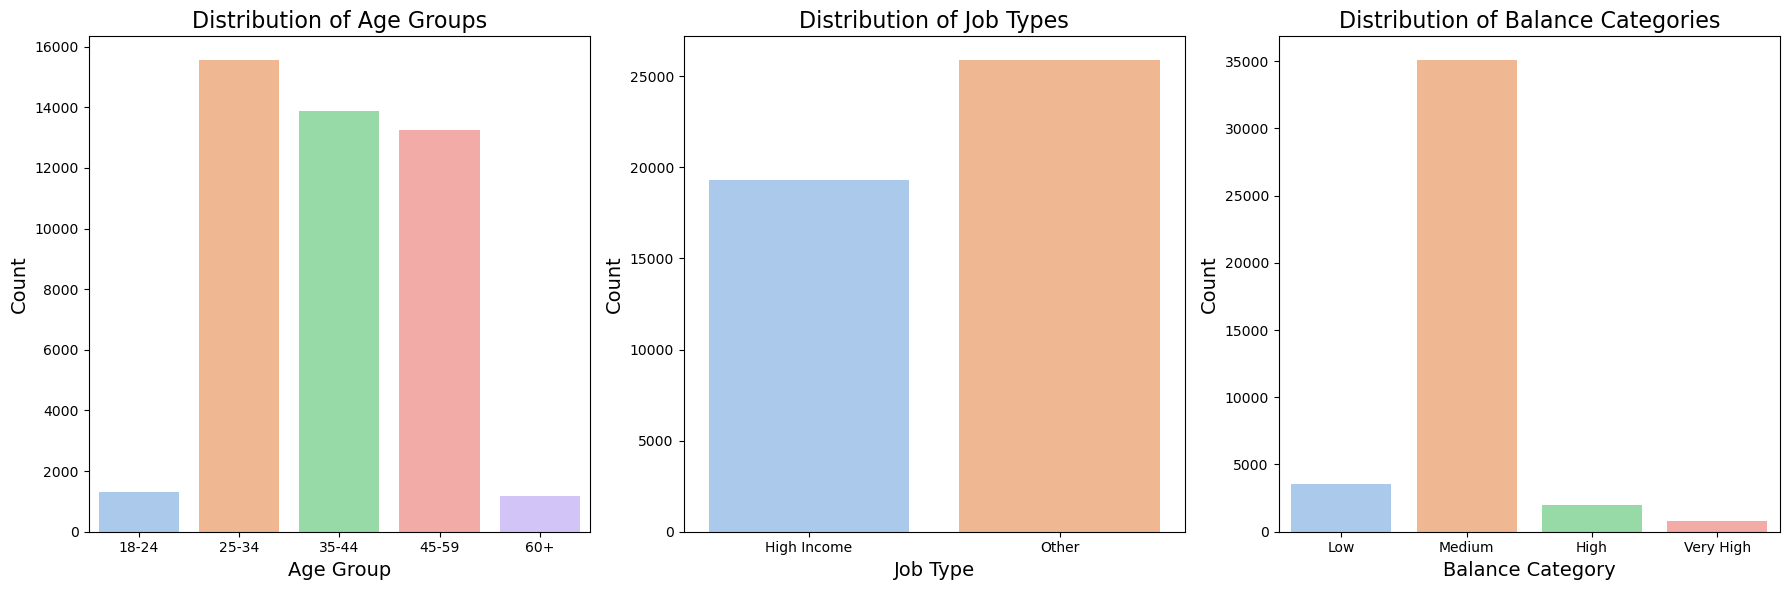

In [51]:
# Set up the figure size
plt.figure(figsize=(18, 6))

# 1. Age Group Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df_marketing_final, x='age_group', palette='pastel')
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 2. Job Type Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df_marketing_final, x='job_type', palette='pastel')
plt.title('Distribution of Job Types', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 3. Balance Category Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df_marketing_final, x='balance_category', palette='pastel')
plt.title('Distribution of Balance Categories', fontsize=16)
plt.xlabel('Balance Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()